In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb

from steves_utils.ptn_do_report import (
    get_loss_curve,
)


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
trials = get_experiments_from_path(
    os.path.join(get_experiments_base_path(), "hyperparameters_2/")
#     "/tmp/trials"
)

all_trials = pd.DataFrame(columns=[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
    "lr"
])

for trial in trials:
    f = pd.DataFrame(trial["results"])
    f["lr"] = trial["parameters"]["lr"]
    f = f[all_trials.columns]

    f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!


    all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs,lr
0,0.752431,0.652390,0.606771,1.160658,14.0,780.073411,0.01000
1,0.770660,0.610240,0.622708,1.204355,12.0,667.166936,0.00100
2,0.765104,0.624446,0.616667,1.124306,12.0,680.353282,0.00010
3,0.065799,5941.195801,0.061042,6274.096191,10.0,558.148576,0.10000
4,0.755903,0.639851,0.588646,1.202297,31.0,1752.312279,0.00001


In [3]:
g = all_trials.groupby("lr")[[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
]].mean()
g

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs
lr,,,,,,
0.00001,0.755903,0.639851,0.588646,1.202297,31.0,1752.312279
0.00010,0.765104,0.624446,0.616667,1.124306,12.0,680.353282
0.00100,0.770660,0.610240,0.622708,1.204355,12.0,667.166936
0.01000,0.752431,0.652390,0.606771,1.160658,14.0,780.073411
0.10000,0.065799,5941.195801,0.061042,6274.096191,10.0,558.148576


(0, 1)

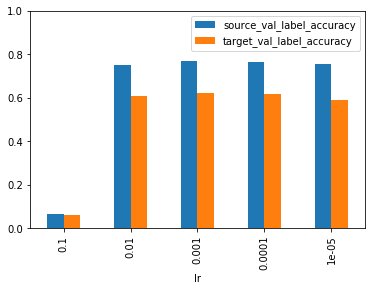

In [4]:
ax = all_trials.groupby("lr")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy"
]].mean().sort_values("lr", ascending=False).plot(kind="bar")

ax.set_ylim(0,1)

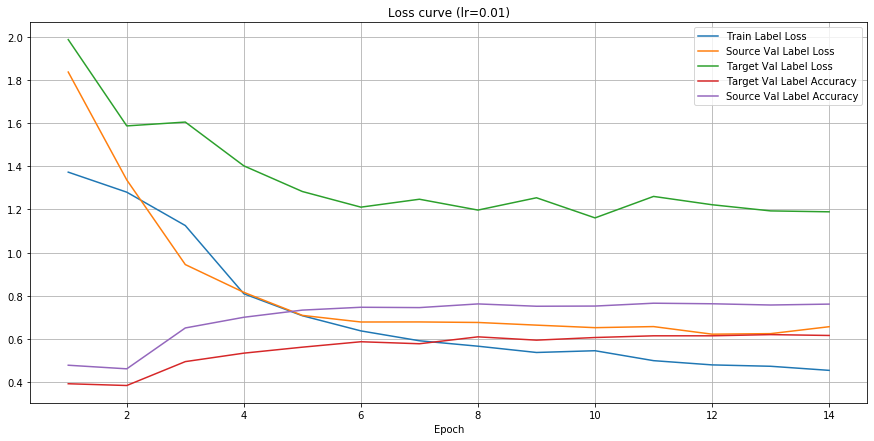

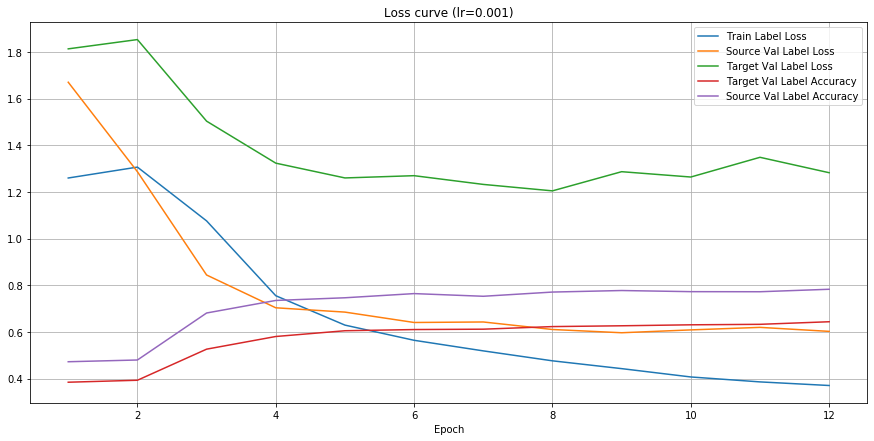

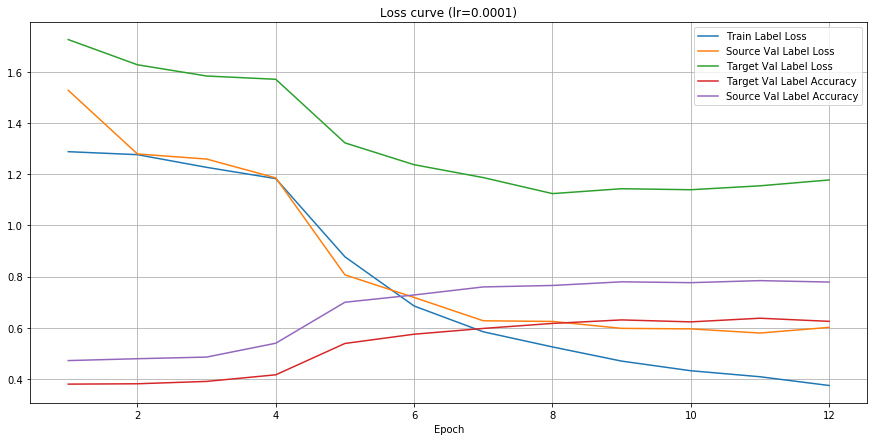

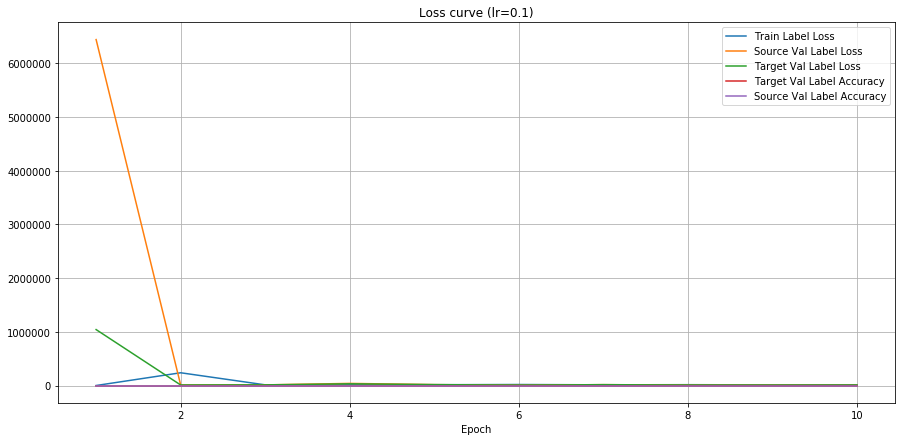

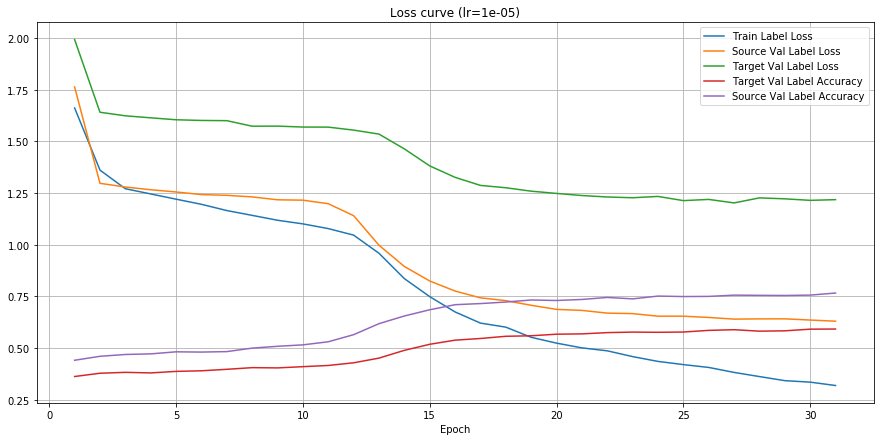

In [5]:
for t in trials:
    ax = get_loss_curve(t)
    lr = t["parameters"]["lr"]
    ax.set_title(f"Loss curve (lr={lr})")